  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

,country,Count
603,United States,2809
251,India,972
736,Unknown,830
506,United Kingdom,418
319,Japan,244
435,South Korea,199
58,Canada,181
444,Spain,145
162,France,124
342,Mexico,110


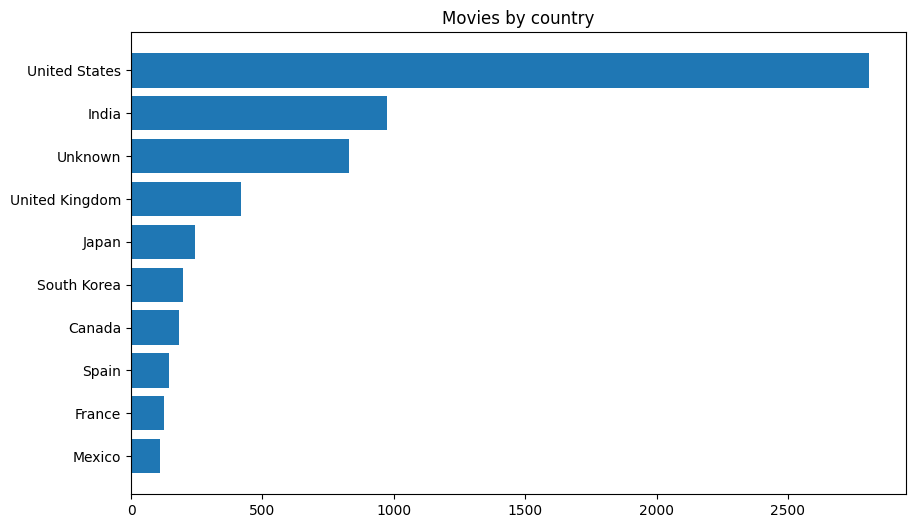

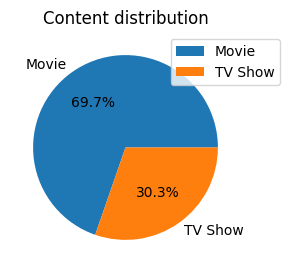

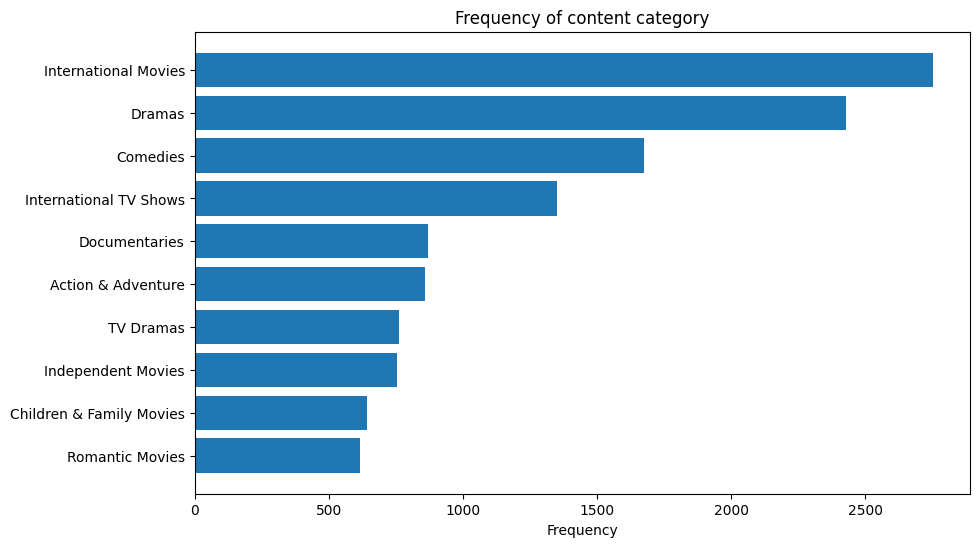

,country,Count
603,United States,2809
251,India,972
736,Unknown,830
506,United Kingdom,418
319,Japan,244
435,South Korea,199
58,Canada,181
444,Spain,145
162,France,124
342,Mexico,110


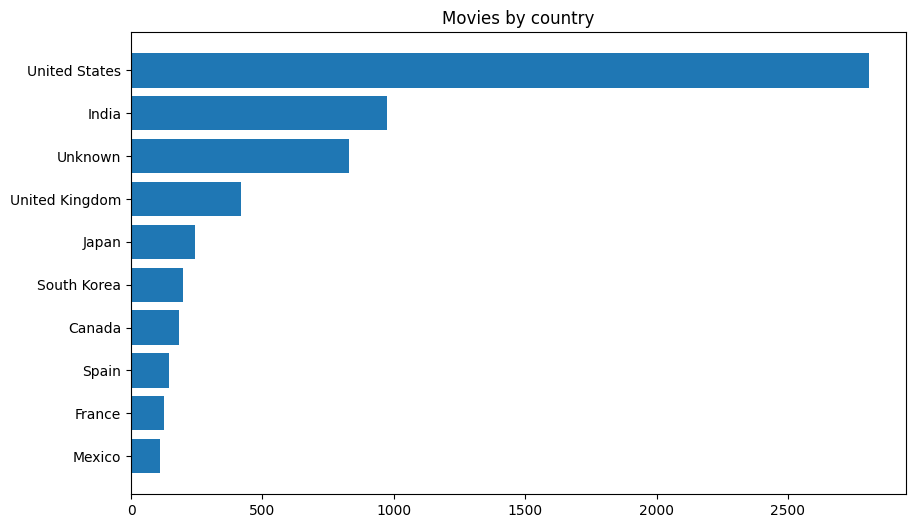

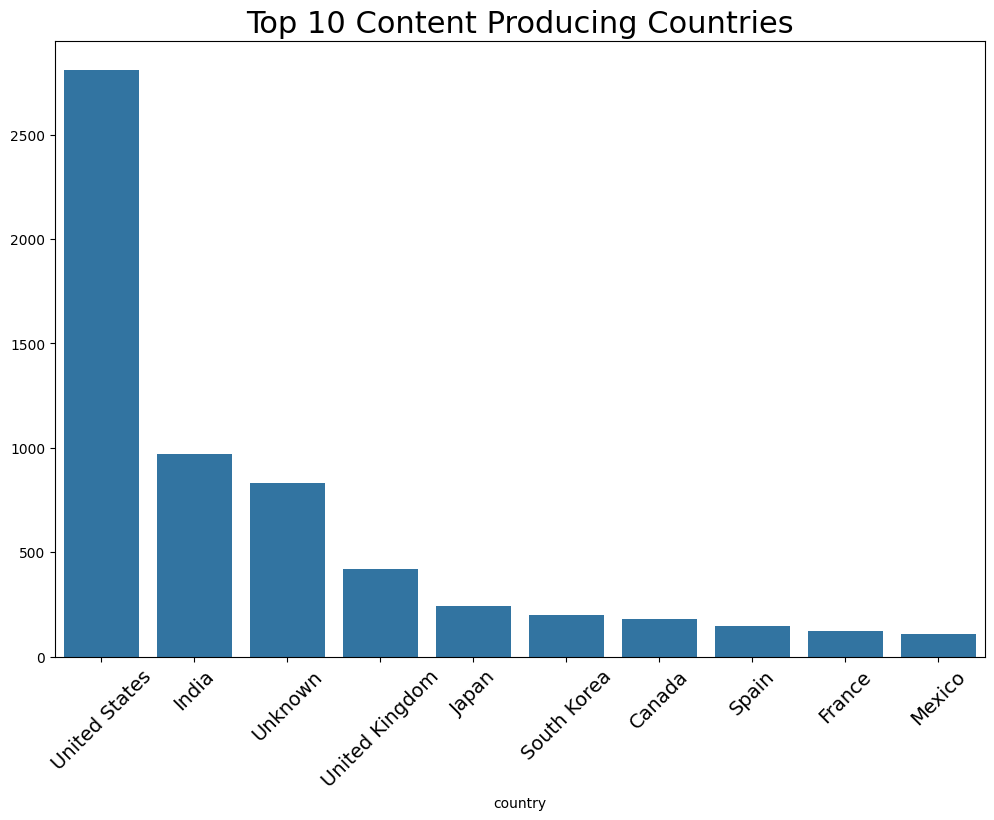

C:\Users\mikae\AppData\Local\Temp\ipykernel_2080\1458462573.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')


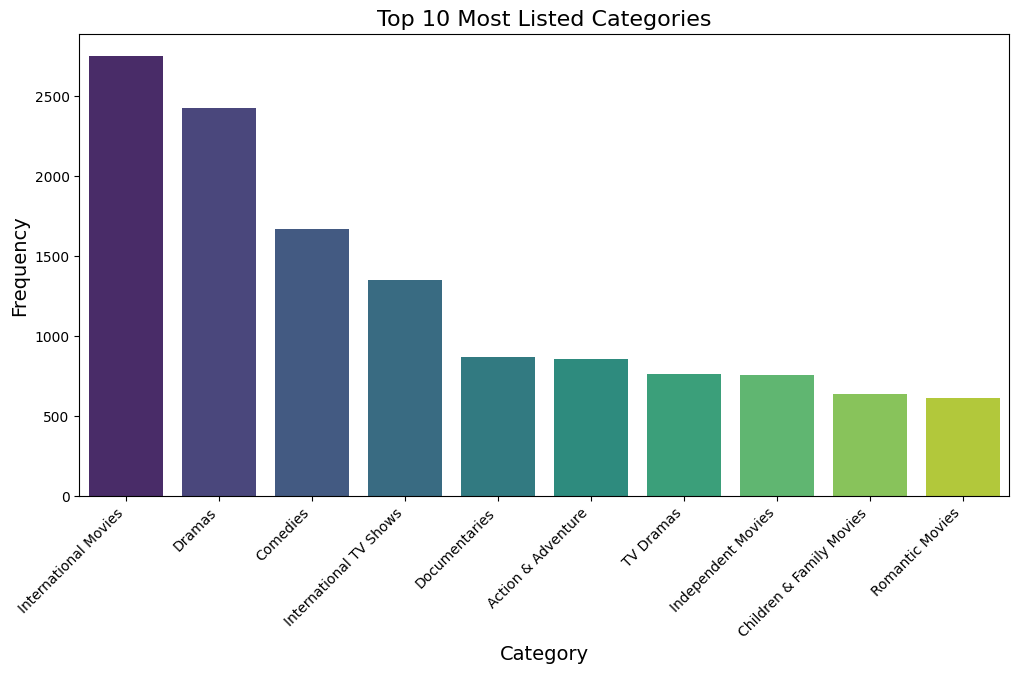

In [54]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
data = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the DataFrame
print(data.head())

data.info()
# Data Cleaning
data.isnull().sum()

data.duplicated().sum()

data = data[data['date_added'].notna()]
data = data[data['duration'].notna()]

data['director'] = data['director'].fillna('Unknown') 
data['cast'] = data['cast'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Unknown')

data.isnull().sum().sum()

data['date_added'].unique()

data['date_added'] = data['date_added'].str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y')

data['year_added'] = data['date_added'].dt.year

# Data Visualization

data.columns

country_movies = data.groupby('country')['show_id'].count().reset_index(name='Count')
country_movies = country_movies.sort_values(by=['Count'], ascending=False).head(10)
display(country_movies)


fig, ax = plt.subplots(figsize=(10,6))
ax.barh(country_movies['country'], country_movies['Count'])
plt.gca().invert_yaxis()

plt.title('Movies by country')
plt.show()


type_distribution = data.groupby('type')['show_id'].count().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(6,3))
ax.pie(type_distribution['Count'], labels=type_distribution['type'], autopct='%1.1f%%')
ax.legend(data['type'], loc='upper right', bbox_to_anchor= (1.2,1))
plt.title('Content distribution')
plt.show()


from collections import Counter

all_categories = ','.join(data['listed_in']).split(',')
category_counts = Counter([category.strip() for category in all_categories])


category_data = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])


category_data = category_data.sort_values(by='Count', ascending=False).head(10)  # Top 10 categorías
plt.figure(figsize=(10, 6))
plt.barh(category_data['Category'], category_data['Count'])
plt.xlabel('Frequency')
plt.title('Frequency of content category')
plt.gca().invert_yaxis()
plt.show()


country_movies = data.groupby('country')['show_id'].count().reset_index(name='Count')
country_movies = country_movies.sort_values(by=['Count'], ascending=False).head(10)
display(country_movies)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(country_movies['country'], country_movies['Count'])
plt.gca().invert_yaxis()

plt.title('Movies by country')
plt.show()


top10_country = data['country'].value_counts().nlargest(10)
top10_country

plt.figure(figsize = (12,8))
sns.barplot(x = top10_country.index, y = top10_country.values)
plt.title("Top 10 Content Producing Countries", fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()


categories = data['listed_in'].str.split(',').explode().str.strip()  
top_10_categories = categories.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()